# IMPORT LIBRARY 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.offline import iplot , plot 
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# READ DATA 

In [6]:
df=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='ISO-8859-1')

# EXPLORE DATA 

In [8]:
# INFOROMATION ABOUT MY DATA 
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
# LET,S SEE SAMPLE OF DATA 
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8403,8404,CA-2016-154067,2/1/2016,2/7/2016,Standard Class,SM-20950,Suzanne McNair,Corporate,United States,Los Angeles,...,90036,West,OFF-PA-10002254,Office Supplies,Paper,Xerox 1883,105.520,4,0.0,48.5392
2562,2563,CA-2015-144288,12/25/2015,12/31/2015,Standard Class,MB-17305,Maria Bertelson,Consumer,United States,Nashville,...,37211,South,OFF-PA-10002787,Office Supplies,Paper,Xerox 227,10.368,2,0.2,3.6288
2150,2151,US-2017-139969,11/19/2017,11/26/2017,Standard Class,AF-10870,Art Ferguson,Consumer,United States,College Station,...,77840,Central,FUR-CH-10001973,Furniture,Chairs,Office Star Flex Back Scooter Chair with White...,233.058,3,0.3,-53.2704
4323,4324,US-2015-147662,2/14/2015,2/19/2015,Standard Class,KB-16315,Karl Braun,Consumer,United States,Akron,...,44312,East,OFF-BI-10002160,Office Supplies,Binders,Acco Hanging Data Binders,2.286,2,0.7,-1.6764
9337,9338,CA-2014-155264,10/19/2014,10/22/2014,Second Class,RP-19270,Rachel Payne,Corporate,United States,San Francisco,...,94110,West,OFF-BI-10003196,Office Supplies,Binders,Accohide Poly Flexible Ring Binders,2.992,1,0.2,1.1220


In [10]:
# let,s see data  columns 
df.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
# let,s cheack if data  has nan values 
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
print (f"NUMBER OF ROW IS : {df.shape[0]}\nNUMBER OF COLUMNS :{df.shape[1]}")

NUMBER OF ROW IS : 9994
NUMBER OF COLUMNS :21


In [15]:
# LETS DESCRIBE OUR DATA 
df.describe().iloc[: ,:5]

,Row ID,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203
std,2885.163629,32063.693350,623.245101,2.225110,0.206452
min,1.000000,1040.000000,0.444000,1.000000,0.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000


In [16]:
# Check Duplicated rows
df.duplicated().any()

False

# HANDEL DATE DATA 

In [20]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [21]:
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day

# WHICH COUNTRY THEY HAVE SALES 

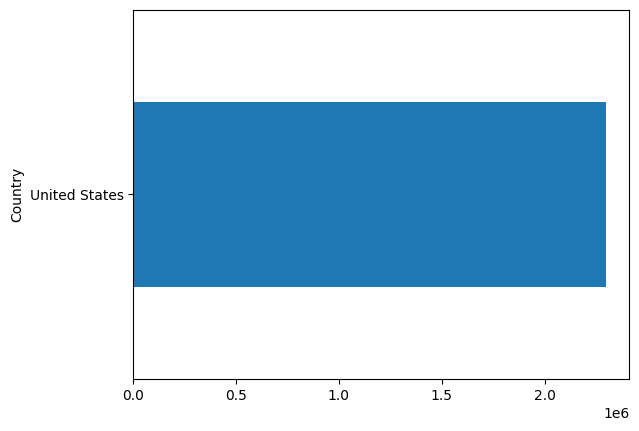

In [23]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh();

In [22]:
df.columns 


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'OrderY',
       'OrderM', 'OrderD'],
      dtype='object')

# TOP SALES IN STATES 

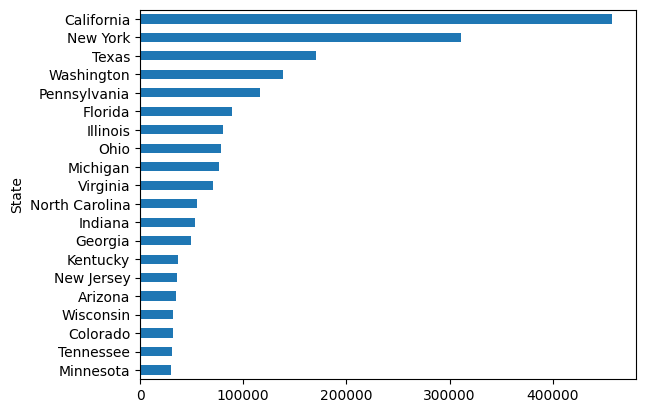

In [24]:
df.groupby("State")["Sales"].sum().sort_values(ascending=True).tail(20).plot.barh();

# TOP 20 SALES BY PROFIT 

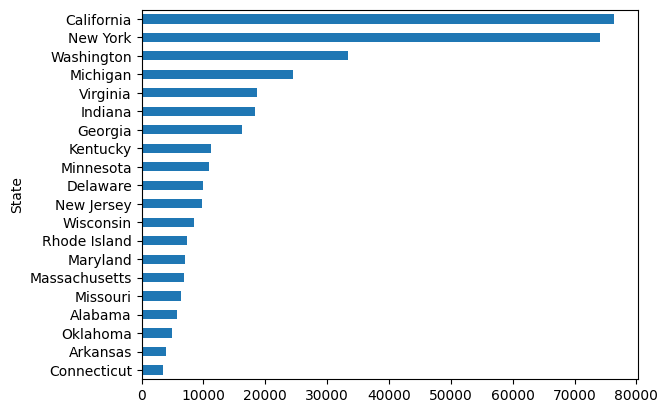

In [25]:
df.groupby("State")["Profit"].sum().sort_values(ascending=True).tail(20).plot.barh();

# TOP CITY BY PROFIT 

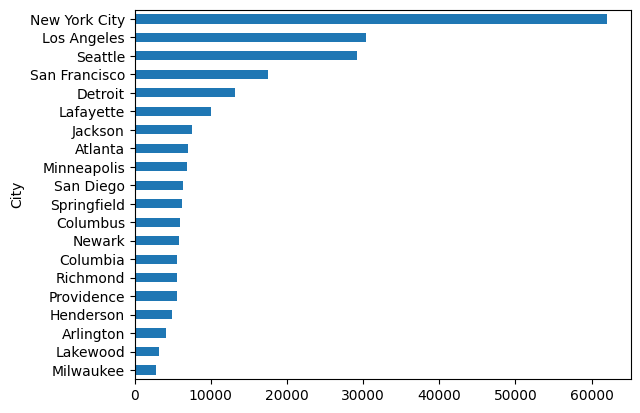

In [27]:
df.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh();

# HIST FOR SALES 

(array([9.876e+03, 9.100e+01, 1.300e+01, 6.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.44000000e-01, 2.26424760e+03, 4.52805120e+03, 6.79185480e+03,
        9.05565840e+03, 1.13194620e+04, 1.35832656e+04, 1.58470692e+04,
        1.81108728e+04, 2.03746764e+04, 2.26384800e+04]),
 <BarContainer object of 10 artists>)

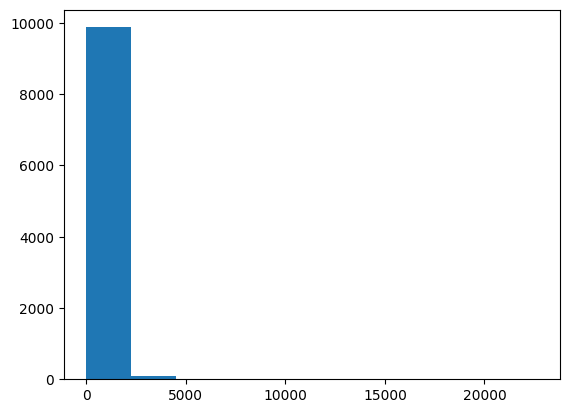

In [29]:
plt.hist(df["Sales"])

# CHEACK DISTIBUTION 

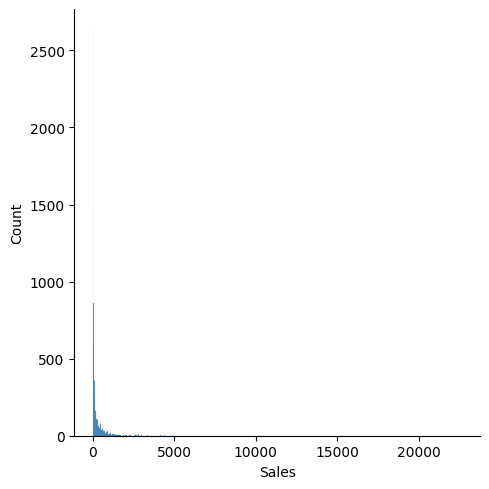

In [31]:
sns .displot(df['Sales'])

# TOP 20 CUSTOMMER 

<Axes: ylabel='Customer Name'>

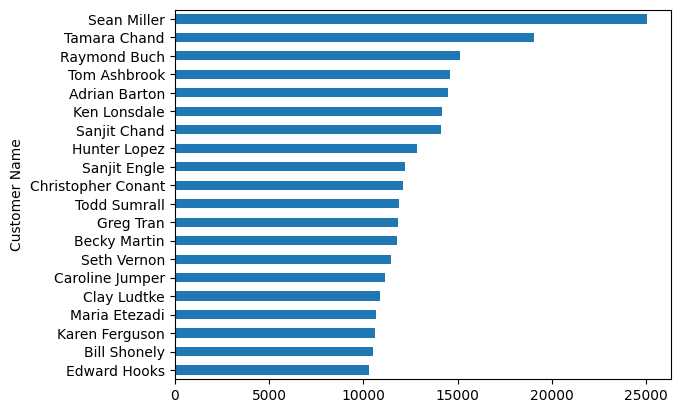

In [32]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh()

# SALES BY CATEGORY

<Axes: ylabel='Category'>

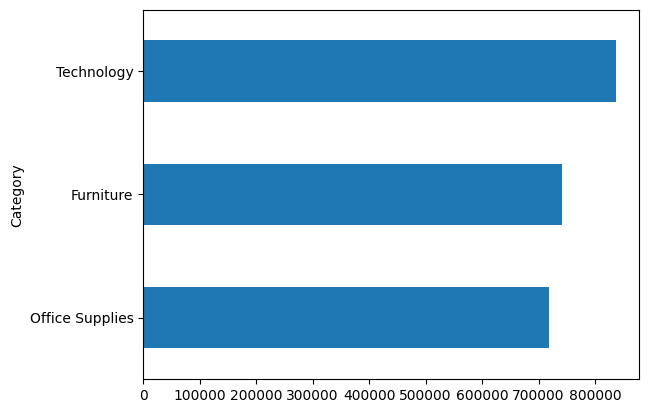

In [33]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh()

# PROFIT BY CATEGORY 

<Axes: ylabel='Category'>

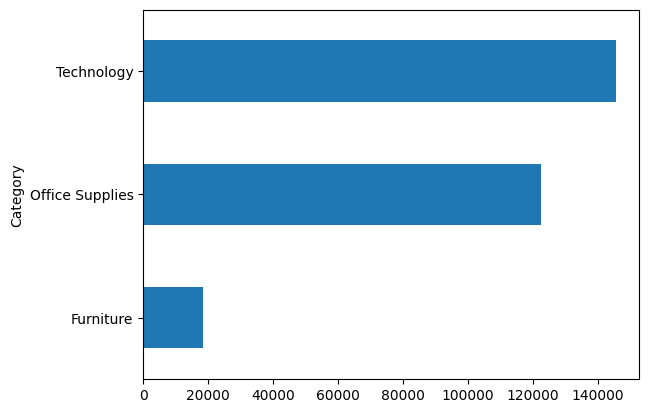

In [34]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh()

# SUB_CATEGORY BY SALES 

<Axes: xlabel='Sub-Category'>

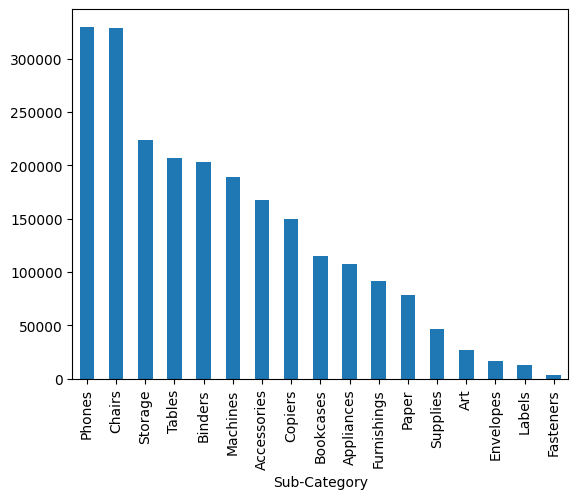

In [35]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar()

# SALES GROWING BY YEAR 

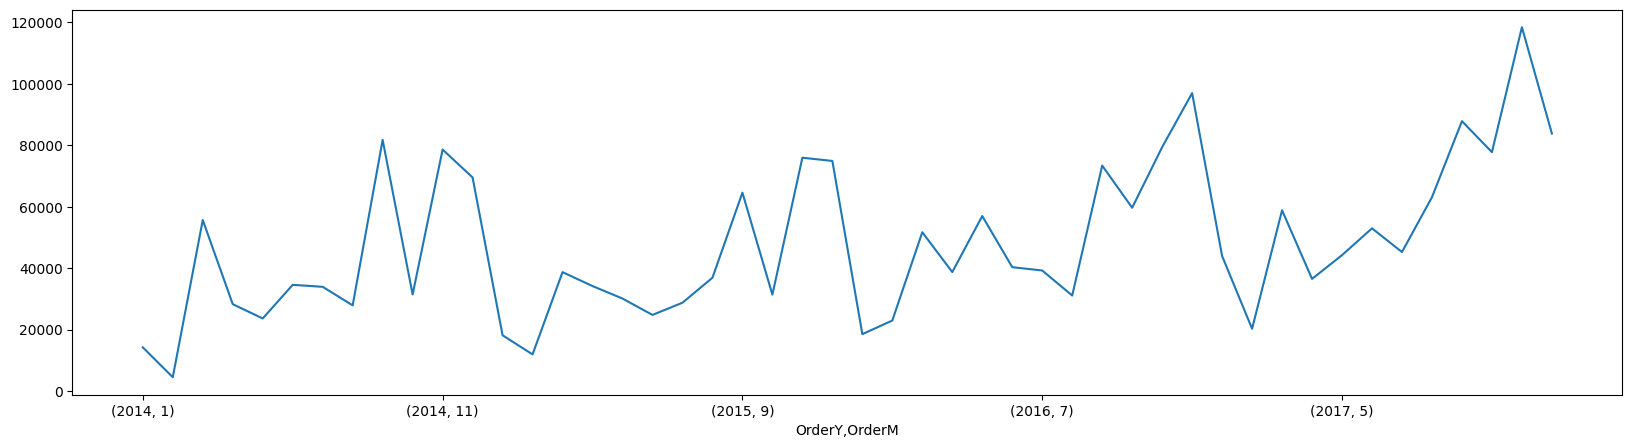

In [37]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot();

# PROFIT GEOWING BY YEAR

<Axes: xlabel='OrderY,OrderM'>

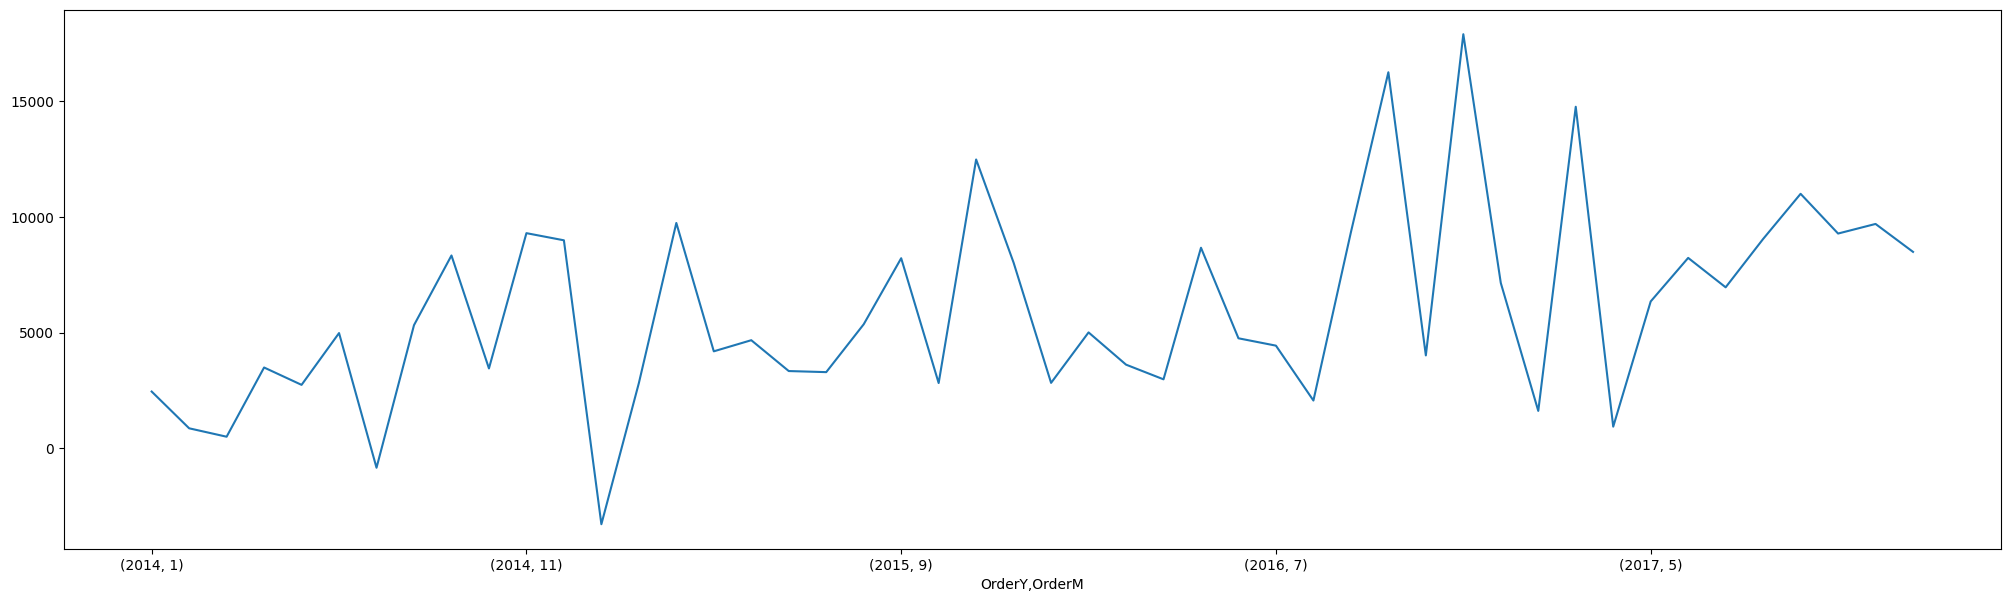

In [38]:
plt.figure(figsize=(25,7))
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot()

# COUNT PLOT FOR SHIP MODE 

<Axes: xlabel='Ship Mode', ylabel='count'>

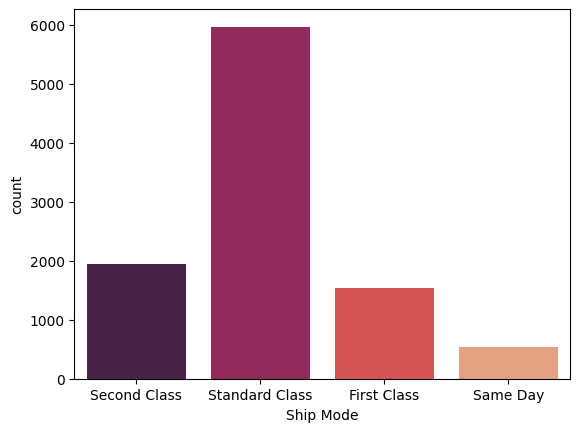

In [40]:
sns.countplot(x=df['Ship Mode'],palette='rocket')

# COUNTPLOT FOR SEGMENT    

<Axes: xlabel='Segment', ylabel='count'>

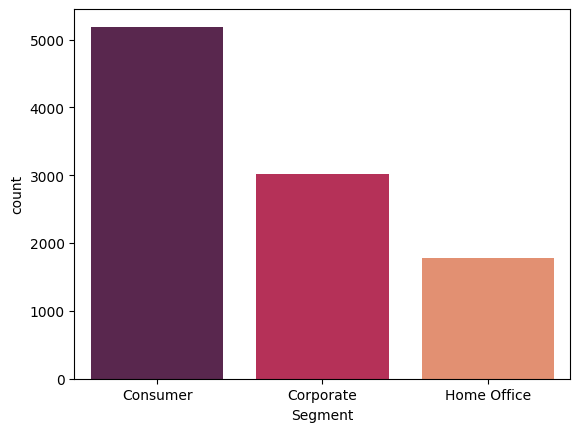

In [42]:
sns.countplot (x=df["Segment"],palette='rocket')

# COUNTPLOT FOR SUB CATEGORY 

Text(0.5, 1.0, 'Sub-Category Count')

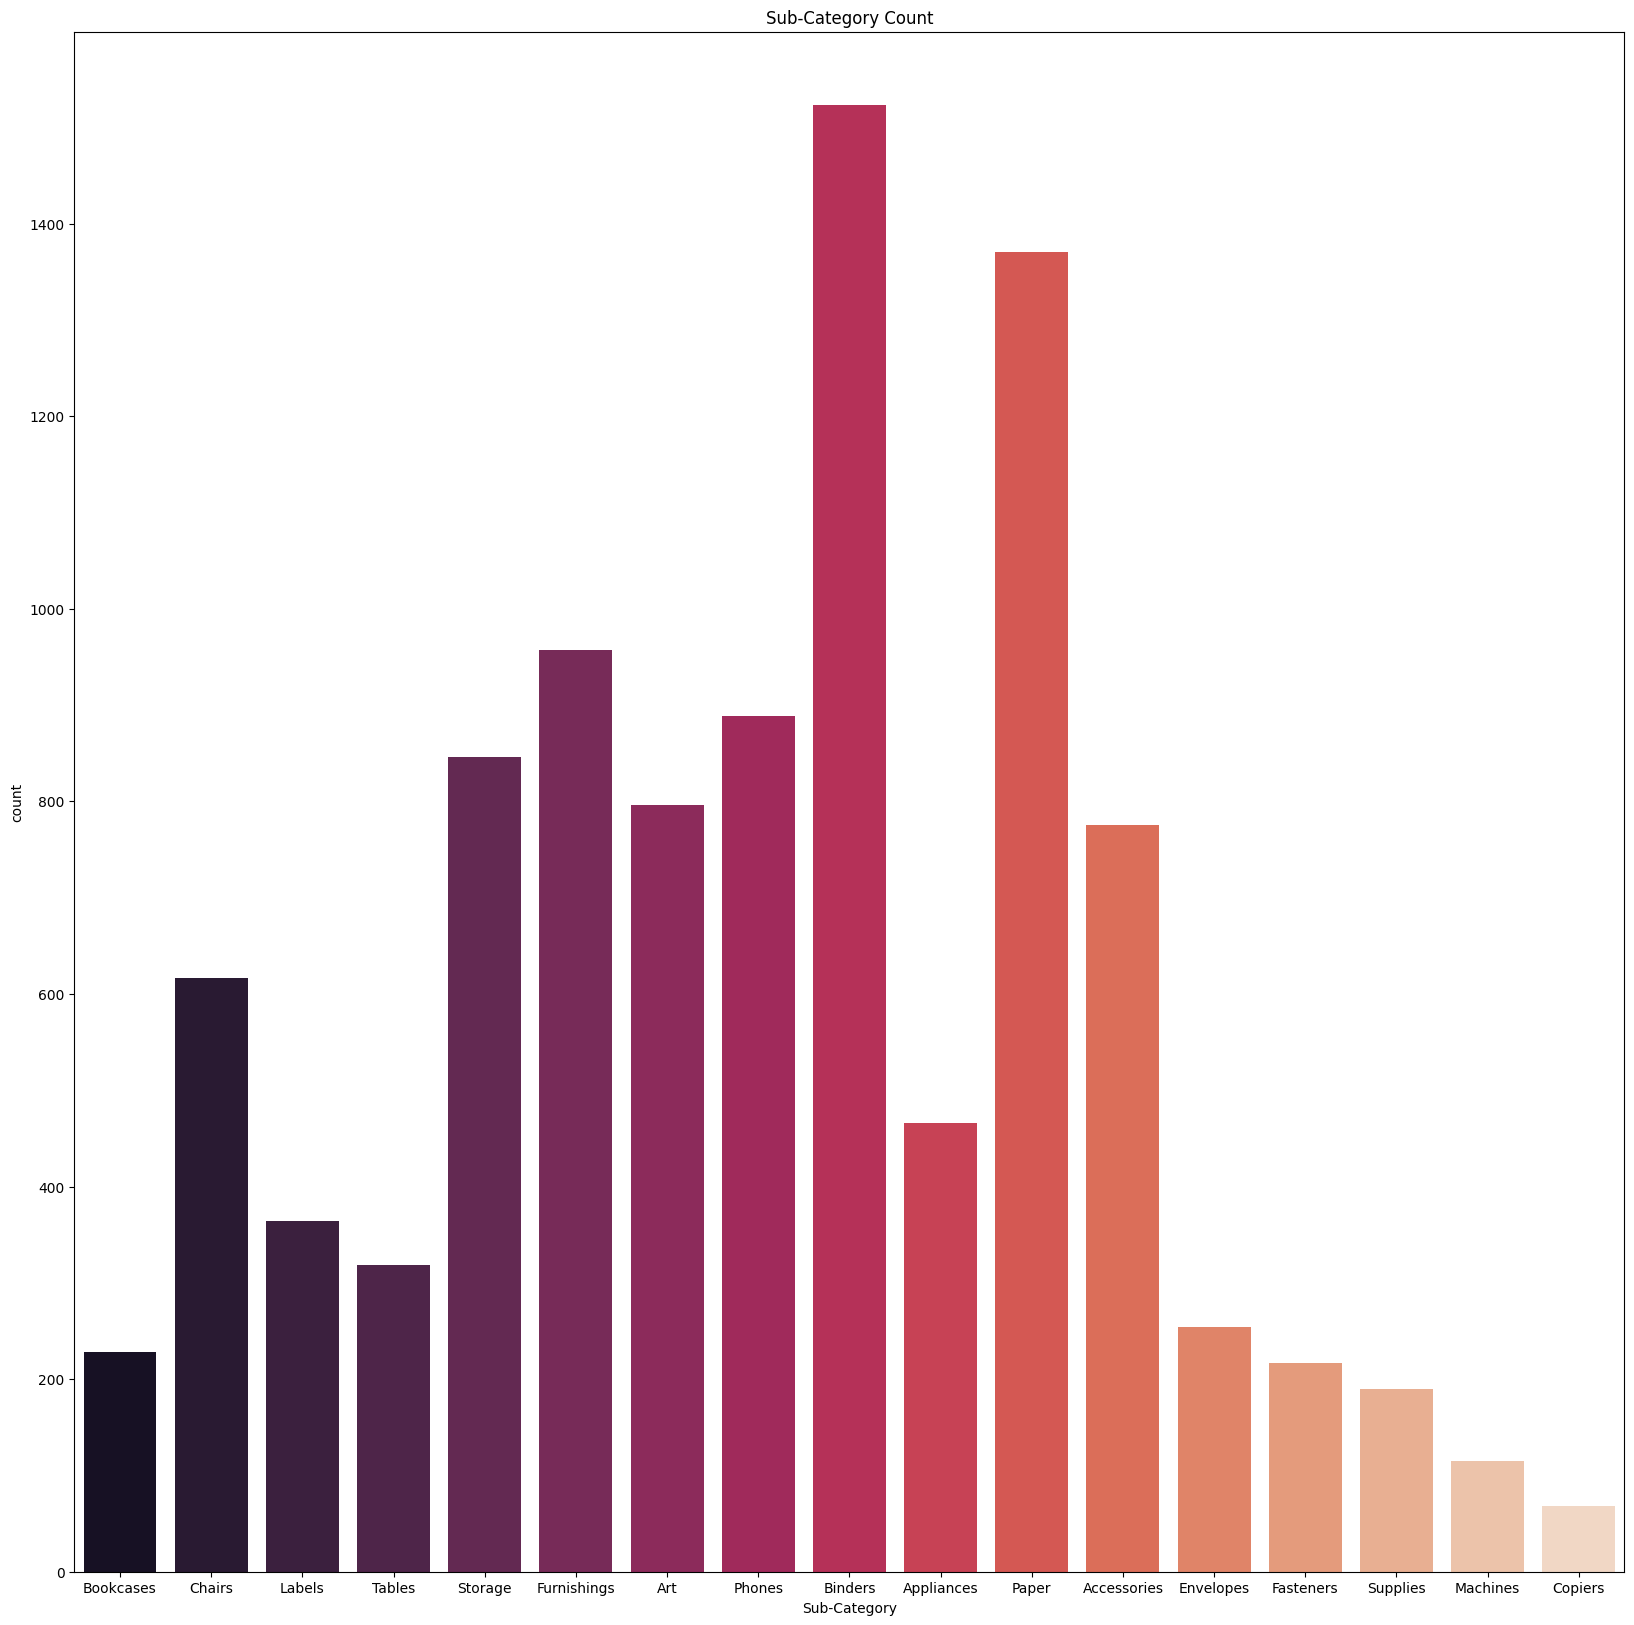

In [44]:
plt.figure(figsize=(20,20))
sns.countplot(x=df['Sub-Category'],palette='rocket')
plt.title("Sub-Category Count")